In [1]:
def GetDistanceMatrix(Parcours_dict, Aggreg_parameters,Aggprefix,dtw_param):
    import numpy as np
    import dtw as dtw

    my_dist_method=dtw_param['dist_method']  # 'euclidian'
    my_window_type=dtw_param['window_type']  # 'sakoechiba'
    my_window_args=dtw_param['window_args']  # 'sakoechiba'
    my_distance_only=dtw_param['distance_only']  # 'sakoechiba'

    Timesteps=int(Aggreg_parameters[Aggprefix + 'Stop_at_item'])-int(Aggreg_parameters[Aggprefix + 'Start_at_item'])
    Parcours_dict['df'].sort_values(['NIP', 'FV1','FV2'], ascending=[True, True, True], inplace=True)

    data_to_plot = Parcours_dict['df'].iloc[:,1:(Timesteps+2)] 
    newColumnName='Start'
    data_to_plot.insert(0,newColumnName,0) # Add an empty column to avoid a not understanding behaviour of the distance computation

    Nb_NIP=len(Parcours_dict['df']['NIP'].unique())
    Nb_dim=1
    result = np.zeros((Nb_NIP, Nb_NIP))

    import time
    start_time = time.time()  # Temps de départ

    for i in range(Nb_NIP):
        for j in range(i,Nb_NIP):   #Compute only half of the matrix as the distance is symetric !
            
            line_i=i*Nb_dim
            line_j=j*Nb_dim

            query=data_to_plot.iloc[line_i : line_i + Nb_dim ,:].values # For one dimension Time serie
            template=data_to_plot.iloc[line_j : line_j + Nb_dim ,:].values # For one dimension Time serie
            #print("i= " +str(i) +  " j= " + str(j))
            #print("query" + str(query))
            #print("query" + str(template))

            #result[i, j] = dtw.dtw(query, template, distance_only=True).distance
            result[i, j] =dtw.dtw(query, template,dist_method=my_dist_method,window_type=my_window_type, window_args=my_window_args,distance_only=my_distance_only).distance
            result[j, i] = result[i, j]

        if i % 100 == 0:  # Mise à jour toutes les 10 itérations
            current_time = time.time() - start_time  # Temps écoulé jusqu'à présent
            time_per_iteration = current_time / (i + 1)  # Temps par itération
            remaining_time = time_per_iteration * (Nb_NIP-1 - i - 1)/60  # Temps restant
            print(f"Iteration {i}/{Nb_NIP-1} - Temps restant estimé: {remaining_time:.2f} minutes")

    end_time = time.time() - start_time  # Temps total écoulé
    print(f"Durée totale de traitement: {end_time:.2f} secondes")

    return result

In [2]:
#Parameter definitions

Aggprefix=''
Aggreg_parameters={Aggprefix + 'Report_type': '',
                        Aggprefix + 'Aggreg_type': '',
                        Aggprefix + 'Date_ref': '',
                        Aggprefix + 'Start_at_item': 0,
                        Aggprefix + 'Stop_at_item': 24,
                        Aggprefix + 'Method': '',
                        Aggprefix + 'Type_filter1': '',
                        Aggprefix + 'Val_filter1': '',
                        Aggprefix + 'Type_filter2': '',
                        Aggprefix + 'Val_filter2': '',
                        Aggprefix + 'Param_J0': '',
                            }

dtw_param={
'dist_method': 'euclidean', # 

# The distance metric to use in scipy.spatial.distance.cdist
# If a string, the distance function can be 

#‘braycurtis’, 
#‘canberra’, 
#‘chebyshev’, 
#‘cityblock’, 
#‘correlation’, 
#‘cosine’, 
#‘dice’, 
#‘euclidean’, 
#‘hamming’, 
#‘jaccard’, 
#‘jensenshannon’, 
#‘kulczynski1’, 
#‘mahalanobis’, 
#‘matching’, 
#‘minkowski’, 
#‘rogerstanimoto’, 
#‘russellrao’, 
#‘seuclidean’, 
#‘sokalmichener’, 
#‘sokalsneath’, 
#‘sqeuclidean’, 
#‘yule’. 

'window_type': None, # if None, windows args=None, if sakoechiba, windows args= {'window_size': value as int )}
'window_args': None , # Dict with window size  {'window_size': 8 }
'distance_only':True, # True or False + x ???
#'step_pattern' : 'symmetric2',  #others ?  see https://search.r-project.org/CRAN/refmans/dtw/html/stepPattern.html
'open_begin' : True,
#'open_end' : False,
'keep_internals' : True,
}
#other parameters : step_pattern
#open_begin : 
#open_end : 
#keep_internals :

In [3]:
#Get the data
import pandas as pd
import my_custom_func_batch_follow as Mcfbf
data= pd.read_csv('Agg_test.csv', encoding='ISO-8859-1')
data.drop(data.columns[0], axis=1, inplace=True)
Parcours_dict={'df': data}

#show the data (optional)
Timesteps=int(Aggreg_parameters[Aggprefix + 'Stop_at_item'])-int(Aggreg_parameters[Aggprefix + 'Start_at_item'])
data=data.iloc[:,1:(Timesteps+2)]
new_columns = ['C' + str(i+1) for i in range(len(data.columns))]
data.columns = new_columns
print(data.values)

#Call the GetDistanceMatrix function
dist_matrix=GetDistanceMatrix(Parcours_dict, Aggreg_parameters,Aggprefix,dtw_param)
#Show the results
print(Mcfbf.myprint('Calcul Matrice de distance OK', 1, 1))

dist_matrix

[[1 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0]]
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

Iteration 0/10 - Temps restant estimé: 0.00 minutes
Durée totale de traitement: 0.01 secondes
**************   Calcul Matrice de distance OK Batch 2/1**************


array([[0., 0., 0., 4., 4., 4., 4., 4., 4., 0., 4.],
       [0., 0., 0., 4., 4., 4., 4., 4., 4., 0., 4.],
       [0., 0., 0., 4., 4., 4., 4., 4., 4., 0., 4.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 4., 4., 4., 4., 4., 4., 0., 4.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 4., 0.]])

Experiment_id: 254325646394639955
Artifact Location: mlflow-artifacts:/254325646394639955
Tags: {'Experiment_tag_1': 'Experiment_tag_2'}
Lifecycle_stage: active


c:\Anaconda\envs\Parcours\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anaconda\envs\Parcours\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\envs\Parcours\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anaconda\envs\Parcours\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

**************   Second clustering (Principal clust) OK Batch 2/1**************


c:\Users\vince\Documents\DSTI\DSTI_Projects\ML ICO Activity\src\my_custom_func_Clustering.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  My_avg_NIP_df = My_avg_NIP_df.append(result, ignore_index=True)
c:\Users\vince\Documents\DSTI\DSTI_Projects\ML ICO Activity\src\my_custom_func_Clustering.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  My_avg_NIP_df = My_avg_NIP_df.append(result, ignore_index=True)


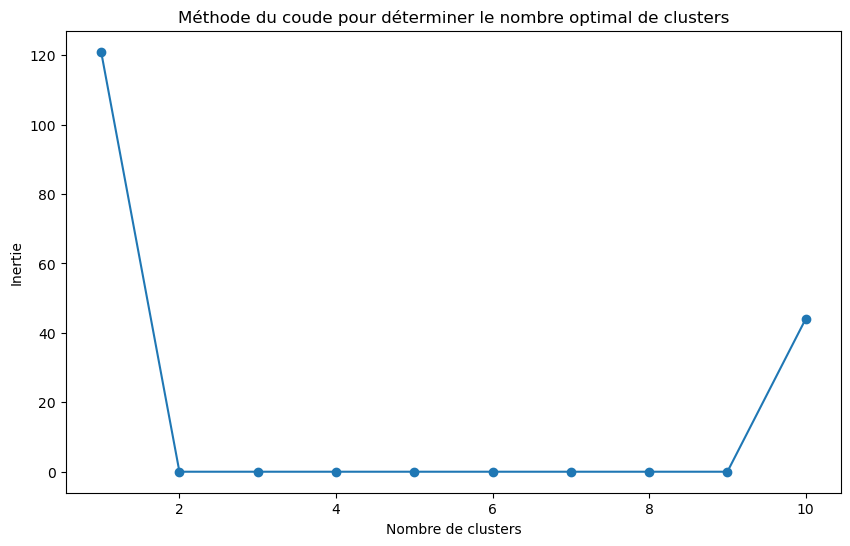

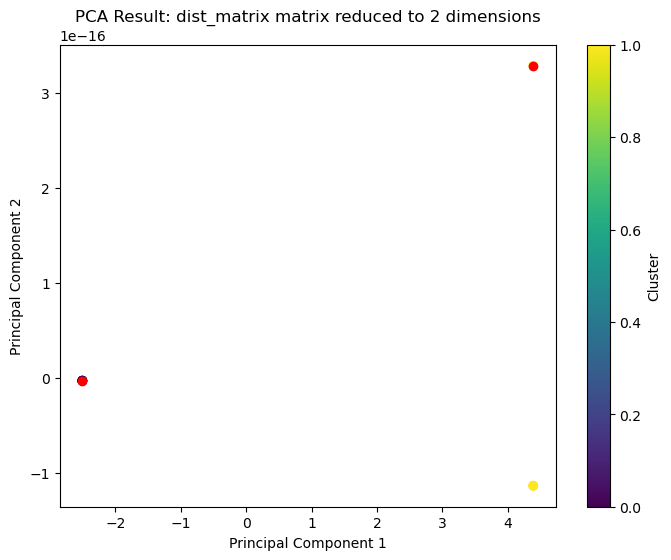

In [4]:
#Do a clustering 
import my_custom_func_Clustering as McfC
import my_custom_func_config as Mcfconf
import mlflow


  #Filename
mypath= 'C:/Users/vince/Documents/DSTI/DSTI_Projects/ML ICO Activity/06 - Temp_outputs/'
curve_filename= mypath + 'Cl' + "_curve" + '.png'
curve_mlflowname= 'Cl' +"_curve"
PCA_filename = mypath + 'Cl' + "_PCA" + '.png'
PCA_mlflowname= 'Cl' + "_PCA"

Parcours_Clust_parameters={
    'Method': 'KMeans',
    'Nb_clusters' : None,
    'max_nb_clusters' : 10,
    'threshold': 0.05,
    'clust_name' : 'Cl',
    'curve_filename' : curve_filename ,
    'curve_mlflowname' : curve_mlflowname, 
    'PCA_filename' : PCA_filename, 
    'PCA_mlflowname' : PCA_mlflowname,
    'Summary_filename' : 'Sum_test',
    'Summary_mlflowname' : 'Sum_test',
    'NIP_Carac_filename' : 'NIP_Carac_test',
    'NIP_Carac_mlflowname' : 'NIP_Carac_test',
    'Table_name' : 'Cl_test'
    }


#MLFLOW SETUP
Experiment_name='Experiment'
Experiment_tag1='Experiment_tag_1'
Experiment_tag2='Experiment_tag_2'
Mcfconf.my_custom_func_MLFLOWconfig(Experiment_name,Experiment_tag1,Experiment_tag2)

#Clustering parameters
#Parcours_Clust_parameters=Mcfconf.set_parcours_clust_parameters(Ac_config)

#SECOND CLUSTERING (principal clust)
Aggreg_Parcours_clust=McfC.cluster(Parcours_dict,dist_matrix,False,mlflow,Parcours_Clust_parameters )
print(Mcfbf.myprint('Second clustering (Principal clust) OK', 1, 1))


In [5]:
Aggreg_Parcours_clust['df'][['NIP','Cl','Cl_Mean_Indiv']]

,NIP,Cl,Cl_Mean_Indiv
0,N198300511,1.0,True
1,N198302025,1.0,False
2,N198302546,1.0,False
3,N198303963,0.0,True
4,N198401875,0.0,False
5,N198403316,0.0,False
6,N198410788,0.0,False
7,N198412339,0.0,False
8,N198502208,0.0,False
9,N198507945,1.0,False


In [19]:

import dtw    
for i in range(11):
    for j in range(11):
        data_to_plot = Parcours_dict['df'].iloc[:,1:(Timesteps+2)] 
        newColumnName='Start'
        data_to_plot.insert(0,newColumnName,0) # Add an empty column to avoid a not understanding behaviour of the distance computation

        Nb_dim=1
        line_i=i*Nb_dim
        line_j=j*Nb_dim

        query=data_to_plot.iloc[line_i : line_i + Nb_dim ,:].values # For one dimension Time serie
        template=data_to_plot.iloc[line_j : line_j + Nb_dim ,:].values # For one dimension Time serie
        #print("i= " +str(i) +  " j= " + str(j))
        #print("query" + str(query))
        #print("query" + str(template))

        my_dist_method=dtw_param['dist_method']
        my_window_type=dtw_param['window_type']
        my_window_args=dtw_param['window_args']
        my_distance_only=dtw_param['distance_only']

        #result[i, j] = dtw.dtw(query, template, distance_only=True).distance
        dtwResult =dtw.dtw(query, template,dist_method=my_dist_method,window_type=my_window_type, window_args=my_window_args,distance_only=my_distance_only,keep_internals=True)
        print(f"i={i} / j={j} / dtw :\nJmin: {dtwResult.jmin}\nM: {dtwResult.M}\nN: {dtwResult.N}\nDistance: {dtwResult.distance}\nNormalizedDistance: {dtwResult.normalizedDistance}")

i=0 / j=0 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 0.0
NormalizedDistance: 0.0
i=0 / j=1 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 0.0
NormalizedDistance: 0.0
i=0 / j=2 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 0.0
NormalizedDistance: 0.0
i=0 / j=3 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=4 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=5 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=6 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=7 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=8 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=0 / j=9 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 0.0
NormalizedDistance: 0.0
i=0 / j=10 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 4.0
NormalizedDistance: 0.07692307692307693
i=1 / j=0 / dtw :
Jmin: 25
M: 26
N: 26
D

In [23]:
dtwResult.localCostMatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

In [28]:
type(dtwResult)

dtw.dtw.DTW

In [7]:
print(f"i={i} / j={j} / dtw :\nJmin: {dtwResult.jmin}\nM: {dtwResult.M}\nN: {dtwResult.N}\nDistance: {dtwResult.distance}\nNormalizedDistance: {dtwResult.normalizedDistance}")

i=10 / j=10 / dtw :
Jmin: 25
M: 26
N: 26
Distance: 0.0
NormalizedDistance: 0.0
